#Power consumed as Function of (Load on chiller)

## Importing the libraries and dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

dataset = pd.read_csv("load_power.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Creating Regressor model and training it on the dataset

In [2]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator= regressor, X=X, y=y, scoring="neg_mean_absolute_error",cv=10)
score = abs(score)
print("The mean absolute error for regression is = %3f \nwith standard deviation = %3f"%(score.mean(), score.std()))

from sklearn.metrics import r2_score
y_pred = regressor.predict(X)
print("The R^2 score for regression = ",r2_score(y,y_pred))

The mean absolute error for regression is = 10.446090 
with standard deviation = 4.765709
The R^2 score for regression =  0.2575930357795191


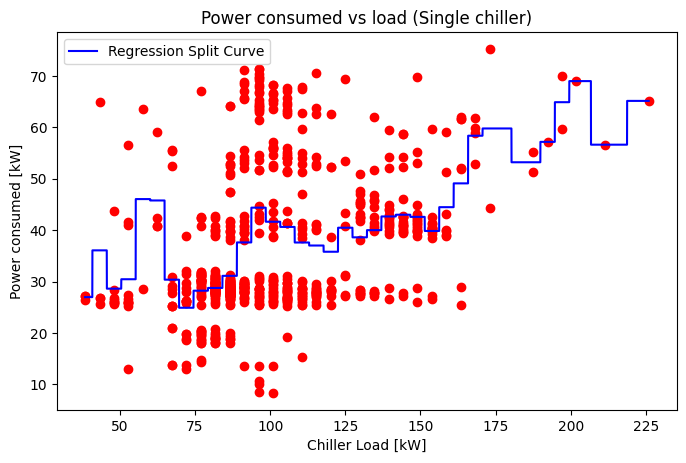

In [4]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(dpi = 100, figsize =[8,5])
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label="Regression Split Curve")
plt.title("Power consumed vs load (Single chiller)")
plt.xlabel("Chiller Load [kW]")
plt.ylabel("Power consumed [kW]")
plt.legend()
plt.show()

## Power consumed as Chiller % capacity utilized

In [5]:
dataset2 = pd.read_csv("utility_power.csv")
X2 = dataset2.iloc[:,:-1].values
y2 = dataset2.iloc[:,-1].values

from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 42)
regressor2.fit(X2,y2)

from sklearn.model_selection import cross_val_score
score2 = cross_val_score(estimator= regressor2, X=X2, y=y2, scoring="neg_mean_absolute_error",cv=10)
score2 = abs(score2)
print("The mean absolute error for regression is = %3f \nwith standard deviation = %3f"%(score2.mean(), score2.std()))


The mean absolute error for regression is = 9.658608 
with standard deviation = 3.997910


## Plotting the results

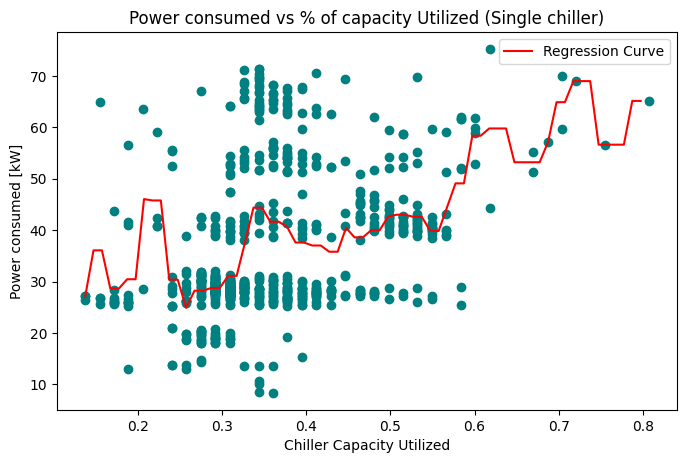

In [6]:
X_grid2 = np.arange(min(X2), max(X2), 0.01)
X_grid2 = X_grid2.reshape((len(X_grid2), 1))
plt.figure(dpi = 100, figsize =[8,5])
plt.scatter(X2, y2, color = 'teal')
plt.plot(X_grid2, regressor2.predict(X_grid2), color = 'red', label="Regression Curve")
plt.title("Power consumed vs % of capacity Utilized (Single chiller)")
plt.xlabel("Chiller Capacity Utilized")
plt.ylabel("Power consumed [kW]")
plt.legend()
plt.show()

## Total power consumed by chilling plant

In [7]:
dataset3 = pd.read_csv("total_power_utility.csv")
X3 = dataset3.iloc[:,:-1].values
y3 = dataset3.iloc[:,-1].values

from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 42)
regressor3.fit(X3,y3)

from sklearn.model_selection import cross_val_score
score3 = cross_val_score(estimator= regressor3, X=X3, y=y3, scoring="neg_mean_absolute_error",cv=10)
score3 = abs(score3)
print("The mean absolute error for regression is = %3f \nwith standard deviation = %3f"%(score3.mean(), score3.std()))


The mean absolute error for regression is = 11.133868 
with standard deviation = 2.171619


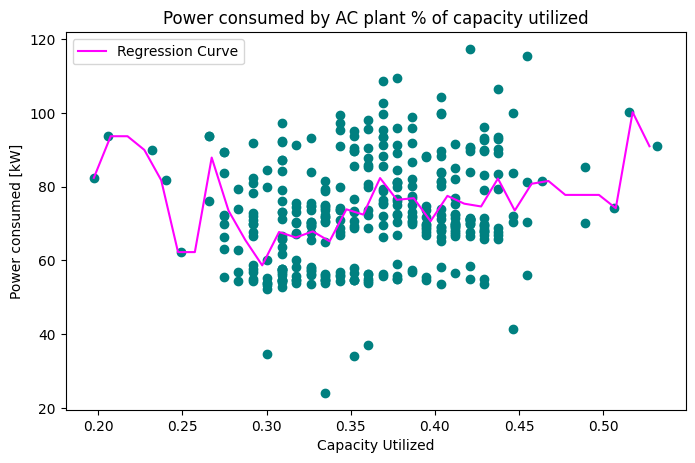

In [8]:
X_grid3 = np.arange(min(X3), max(X3), 0.01)
X_grid3 = X_grid3.reshape((len(X_grid3), 1))
plt.figure(dpi = 100, figsize =[8,5])
plt.scatter(X3, y3, color = 'teal')
plt.plot(X_grid3, regressor3.predict(X_grid3), color = 'magenta', label="Regression Curve")
plt.title("Power consumed by AC plant % of capacity utilized")
plt.xlabel("Capacity Utilized")
plt.ylabel("Power consumed [kW]")
plt.legend()
plt.show()

In [9]:
dataset4 = pd.read_csv("total_load_power.csv")
X4 = dataset4.iloc[:,:-1].values
y4 = dataset4.iloc[:,-1].values

from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor(random_state = 42)
regressor4.fit(X4,y4)

from sklearn.model_selection import cross_val_score
score4 = cross_val_score(estimator= regressor4, X=X4, y=y4, scoring="neg_mean_absolute_error",cv=10)
score4 = abs(score4)
print("The mean absolute error for regression is = %3f \nwith standard deviation = %3f"%(score4.mean(), score4.std()))

The mean absolute error for regression is = 16.143742 
with standard deviation = 4.529783


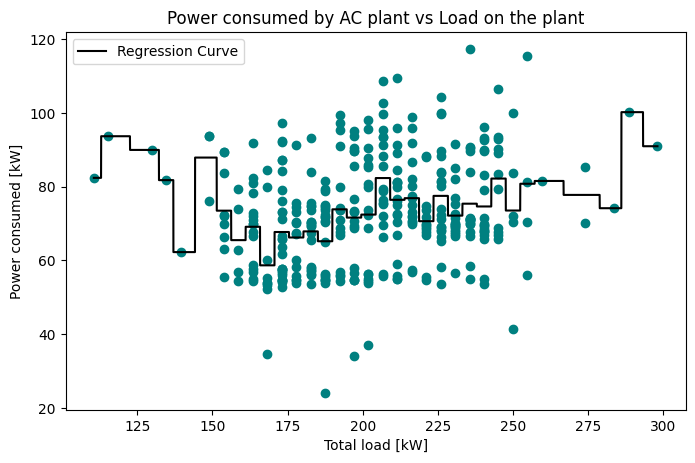

In [10]:
X_grid4 = np.arange(min(X4), max(X4), 0.01)
X_grid4 = X_grid4.reshape((len(X_grid4), 1))
plt.figure(dpi = 100, figsize =[8,5])
plt.scatter(X4, y4, color = 'teal')
plt.plot(X_grid4, regressor4.predict(X_grid4), color = 'black', label="Regression Curve")
plt.title("Power consumed by AC plant vs Load on the plant")
plt.xlabel("Total load [kW]")
plt.ylabel("Power consumed [kW]")
plt.legend()
plt.show()

## K-Means clustering to analyze chillers efficient region

## Importing dataset kWpT vs % chiller capacity utilisation

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [12]:
dataset5 = pd.read_csv('kwpt_pcu.csv')
X5 = dataset5.iloc[:,[0,1]].values

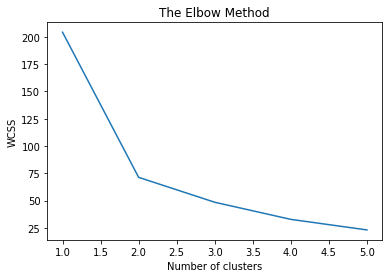

In [13]:
from sklearn.cluster import KMeans
wcss =[] #within cluster sum of squares used to find how dense a cluster is
for i in range (1,6):
  clustering = KMeans(n_clusters = i, init="k-means++", n_init=30, random_state =42)
  clustering.fit(X5)
  wcss.append(clustering.inertia_)

# now ploting the curve for elbow method 
plt.plot(range (1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

Therefore k =2 will be optimum

In [14]:
clustering = KMeans(n_clusters=2, init="random",  random_state = 42)
y_kmeans = clustering.fit_predict(X5)


In [15]:
clustering.cluster_centers_

array([[0.31029214, 2.15853718],
       [0.37564731, 1.09277978]])

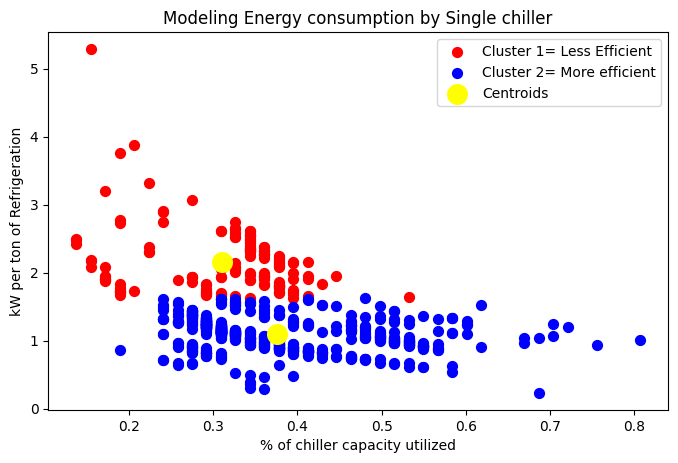

In [16]:
plt.figure(dpi=100,figsize=[8,5])
plt.scatter(X5[y_kmeans == 0, 0], X5[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1= Less Efficient')
plt.scatter(X5[y_kmeans == 1, 0], X5[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2= More efficient')
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Modeling Energy consumption by Single chiller')
plt.xlabel('% of chiller capacity utilized')
plt.ylabel('kW per ton of Refrigeration')
plt.legend()
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X6 = dataset5.iloc[:,:-1].values
y6 = dataset5.iloc[:,-1].values
pf = PolynomialFeatures(degree =2)
X_poly = pf.fit_transform(X6)
poly_reg = LinearRegression()
poly_reg.fit(X_poly,y6)

#ploting the regresssion 


LinearRegression()

In [18]:
kwpt = poly_reg.predict(pf.fit_transform([[0.4]]))
print(' If the Chiller capacity utilized is 40 percent the kWpT =%3f'%(kwpt))

 If the Chiller capacity utilized is 40 percent the kWpT =1.172053


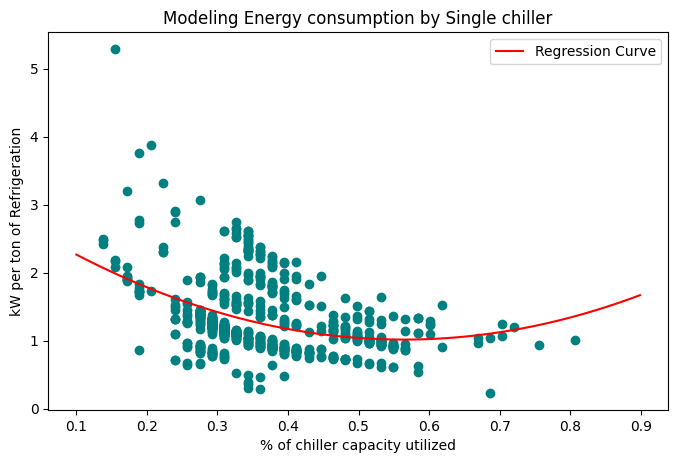

In [19]:
coefficients = poly_reg.coef_
intercept = poly_reg.intercept_

x_axis = np.arange(0.1,0.9,0.001)
response = intercept + (coefficients[1]*x_axis) + (coefficients[2]* (x_axis**2))

plt.figure(dpi = 100 , figsize=[8,5])
plt.scatter(X6,y6, c='teal')
plt.plot(x_axis, response, c='red', label ="Regression Curve")
plt.title('Modeling Energy consumption by Single chiller')
plt.xlabel('% of chiller capacity utilized')
plt.ylabel('kW per ton of Refrigeration')
plt.legend()
plt.show()

In [20]:
print(coefficients, intercept)

[ 0.         -6.55403639  5.81232656] 2.863695473230254


In [21]:
poly_reg.predict(pf.transform([[0.51558]])) ##answer

array([1.02961394])

## kWpT vs % of chiller capacity utilized

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
data = pd.read_csv('total_kwpt_pcu.csv')
X7 = data.iloc[:,:-1].values
y7 = data.iloc[:,-1].values


## Applying Polynomial Linear Regression of Degree 2 on the available dataset.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
feature_matrix = PolynomialFeatures(degree = 2)
X_poly2 = feature_matrix.fit_transform(X7)
# now passing the data 
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly2, y7)


LinearRegression()

In [24]:
poly_regressor.predict(feature_matrix.transform([[0.663]]))

array([1.89449785])

In [25]:
print(X_poly)

[[1.         0.36050878 0.12996658]
 [1.         0.37767587 0.14263906]
 [1.         0.41201004 0.16975227]
 ...
 [1.         0.36050878 0.12996658]
 [1.         0.30900753 0.09548565]
 [1.         0.32617462 0.10638988]]


In [26]:
intercpt = poly_regressor.intercept_
coef = poly_regressor.coef_
print(coef, intercpt)

[  0.         -14.89883486  16.67166899] 4.444076494896583


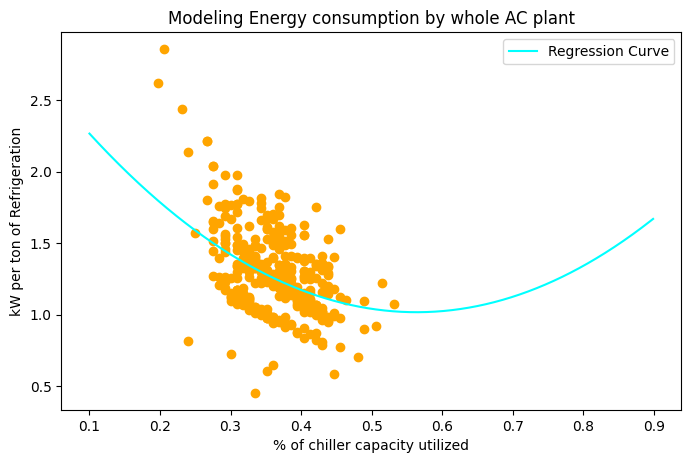

In [27]:
x_ordinate = np.arange(0.1,0.9,0.001)
y_abscissa = intercpt + (coef[1]*x_axis) + (coef[2]* (x_ordinate**2))

plt.figure(dpi = 100 , figsize=[8,5])
plt.scatter(X7,y7, c='orange')
plt.plot(x_axis, response, c='cyan', label ="Regression Curve")
plt.title('Modeling Energy consumption by whole AC plant')
plt.xlabel('% of chiller capacity utilized')
plt.ylabel('kW per ton of Refrigeration')
plt.legend()
plt.show()

In [28]:
load = [194.79629594 , 194.79629594, 194.79629594,192.96098513, 192.96098513,191.12567431,192.96098513,194.79629594,
        198.46691758,203.97285003,207.64347167,211.3140933,214.98471494, 214.98471494,213.14940412,211.3140933,211.3140933,
        207.64347167,203.97285003,200.3022284,198.46691758,196.63160676,196.63160676,194.79629594]
time =[]
capacity_utilized =[]
for i in range(0,24):
  capacity = load[i]/560
  capacity_utilized.append(capacity)
  time.append(i)
capacity_utilized = np.array(capacity_utilized).reshape(-1, 1)
capacity_utilized = feature_matrix.fit_transform(capacity_utilized)

kwpt = poly_regressor.predict(capacity_utilized)

# now converting kwpt to power consumed 

power_profile = []
for j in range(0,24):
  tonn = load[j]/3.516
  power = kwpt[j] * tonn
  power_profile.append(power)

In [29]:
print(power_profile)

[70.84804986759727, 70.84804986759727, 70.84804986759727, 70.78397790913274, 70.78397790913274, 70.72789506037414, 70.78397790913274, 70.84804986759727, 71.00240445114369, 71.30787549975179, 71.56735871098341, 71.8767450475016, 72.24052118246045, 72.24052118246045, 72.05155397330513, 71.8767450475016, 71.8767450475016, 71.56735871098341, 71.30787549975179, 71.09380874376832, 71.00240445114369, 70.92067177039826, 70.92067177039826, 70.84804986759727]


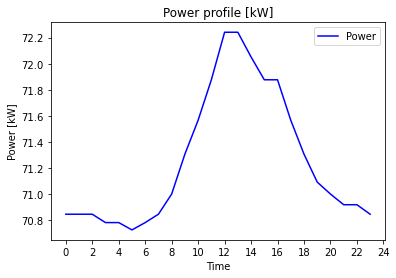

In [30]:
plt.plot(time,power_profile, color = 'blue', label="Power")
plt.xlabel("Time")
plt.ylabel("Power [kW]" )
plt.title("Power profile [kW]")
#plt.title("Cooling load, Power & temperature profile")
plt.locator_params(axis='x', nbins=25)
plt.legend()
plt.show()